<a href="https://colab.research.google.com/github/labibasarwer/Predicting-Breast-Cancer-Survival-Using-Machine-Learning/blob/main/Initial_Results_and_Code_Labiba_Sarwer_CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Install required libraries if running in Google Colab
!pip install imbalanced-learn lifelines matplotlib seaborn --quiet

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from lifelines import KaplanMeierFitter

In [30]:
import pandas as pd # Import the pandas library and assign it to the alias 'pd'

# Load dataset, specifying the engine for CSV files
df = pd.read_csv("/content/drive/MyDrive/Breast_Cancer - Breast_Cancer.csv") # Changed pd.read_excel to pd.read_csv

In [39]:
import pandas as pd # Import the pandas library and assign it to the alias 'pd'

# Load dataset, specifying the engine for CSV files
df = pd.read_csv("/content/drive/MyDrive/Breast_Cancer - Breast_Cancer.csv") # Changed pd.read_excel to pd.read_csv

# Print the actual column names to identify the correct target column name
print(df.columns)

# Assuming the actual target column name is 'Status', replace 'Survival_Status' with 'Status'
if "Status" in df.columns:  # Check for the correct column name
    X = df.drop(columns=['Status'])  # Drop target column from features
    y = df['Status']  # Assign target variable
else:
    raise KeyError("Column 'Status' not found in the DataFrame. Please check the column names.")

# Drop unnecessary columns (Modify as needed)
df = df.drop(columns=['ID', 'Patient_ID'], errors='ignore')

# Encode categorical variables
# df = pd.get_dummies(df, drop_first=True) # This line is causing problems
# We'll encode categorical variables later after separating features and target

# Handle missing values (if any)
df = df.dropna()

# Separate features and target variable
X = df.drop(columns=['Status'])  # Now drop 'Status' which is the target column
y = df['Status']  # Assign target variable

# Now apply one-hot encoding ONLY to the features (X)
X = pd.get_dummies(X, drop_first=True)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [40]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Train Neural Network
nn_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=42)

In [41]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"🔹 **{model_name} Performance:**")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

# Evaluate all models
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(rf_clf, X_test, y_test, "Random Forest")
evaluate_model(nn_clf, X_test, y_test, "Neural Network")

🔹 **Logistic Regression Performance:**
Accuracy: 0.8820

Classification Report:
               precision    recall  f1-score   support

       Alive       0.85      0.92      0.89       679
        Dead       0.92      0.84      0.88       685

    accuracy                           0.88      1364
   macro avg       0.88      0.88      0.88      1364
weighted avg       0.88      0.88      0.88      1364


Confusion Matrix:
 [[627  52]
 [109 576]]

--------------------------------------------------

🔹 **Random Forest Performance:**
Accuracy: 0.9208

Classification Report:
               precision    recall  f1-score   support

       Alive       0.89      0.95      0.92       679
        Dead       0.95      0.89      0.92       685

    accuracy                           0.92      1364
   macro avg       0.92      0.92      0.92      1364
weighted avg       0.92      0.92      0.92      1364


Confusion Matrix:
 [[648  31]
 [ 77 608]]

--------------------------------------------------

<ipython-input-42-74412ad6cc2c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_df["Importance"], y=feature_df["Feature"], palette="Blues_r")


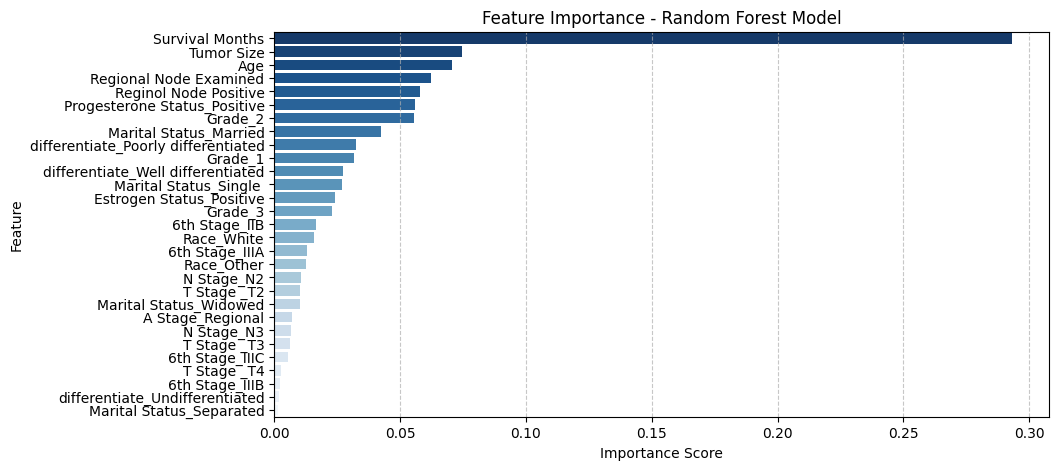

In [42]:
# Get feature importance
feature_importance = rf_clf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_df["Importance"], y=feature_df["Feature"], palette="Blues_r")
plt.title("Feature Importance - Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-45-c9fbb07f6997>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[survival_status_col] = pd.to_numeric(df[survival_status_col].replace({'Alive': 0, 'Dead':1}), errors='coerce').astype(int)


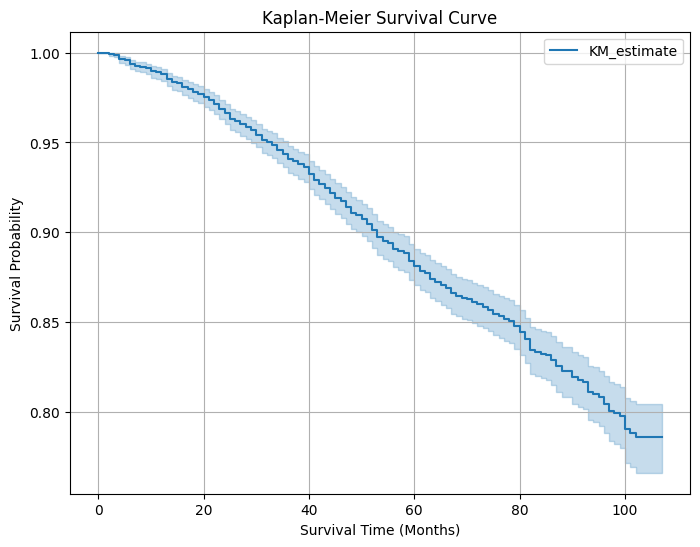

In [45]:
# Assuming 'Survival_Months' and 'Survival_Status' exist in the dataset
kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))
# Check if the column name is 'Survival Months' instead of 'Survival_Months'
survival_months_col = 'Survival Months' if 'Survival Months' in df.columns else 'Survival_Months'
# Check if the column name is 'Status' instead of 'Survival_Status'
survival_status_col = 'Status' if 'Status' in df.columns else 'Survival_Status'

# Convert 'Status' column to numeric (0 for Alive, 1 for Dead)
# Assuming 'Alive' represents censored data (0) and other values represent events (1)
df[survival_status_col] = pd.to_numeric(df[survival_status_col].replace({'Alive': 0, 'Dead':1}), errors='coerce').astype(int)


kmf.fit(df[survival_months_col], event_observed=df[survival_status_col])
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Survival Time (Months)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()